<a href="https://colab.research.google.com/github/nazmul-kaonine/Data-Science-Projects/blob/master/Handwritten%20Digit%20Classification%20using%20Multiple%20Descriptors%20%26%20ANN/HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submitted by:
###Nazmul Kaonine
####PostGrad- UTS

#ALL LIBRARIES AND LOADER FUNCS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from sklearn import svm 
%matplotlib inline
import cv2
import os
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

0

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
                                
                              


                        
        


    return images, labels

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/DLA2/', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/DLA2/', kind='t10k')


labelNames = ["0", "1", "2", "3", "4",
	"5", "6", "7", "8", "9"]

In [ ]:
X_train.shape

(60000, 784)

#VISUALIZATIONS

In [ ]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

#Reshaped the data

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


In [ ]:
def display_image(position):
    image = X_train[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, y_train[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [ ]:
sns.countplot(y_train)
plt.show()
#shows digit label counts

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

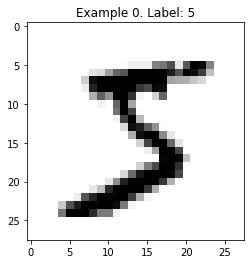

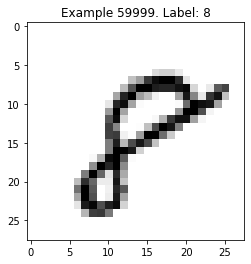

In [ ]:
display_image(0)
plt.show()
display_image(59999)
#to view specific images

#HOG 

##SVM

In [ ]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


In [ ]:
#HOG TRAINING
print("Extracting features from training dataset...")
data_train = []
labels_train = []

for img_index in range(len(X_train)):

  image = (X_train[img_index])
 
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 

  data_train.append(H)
  labels_train.append(y_train[img_index])

print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(60000, 36)
(60000,)


In [ ]:
model = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
# training
model.fit(data_train, labels_train)

print(np.shape(X_train))
print(np.shape(y_train))

(60000, 28, 28)
(60000,)


In [ ]:
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 0.11


In [ ]:
#HOG TESTING

print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]

for img_ind in range(len(X_test)):

  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H.reshape(1, -1))[0]
 
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(y_test[img_ind])
  
print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000, 10)
(10000,)


In [ ]:
# Test set Accuracy
accuracy = metrics.accuracy_score(y_test, predict_test)
print("Accuracy on test dataset:",accuracy)
# Expected test Accuracy 0.75

Accuracy on test dataset: 0.9095


[[ 922    5    5    2    1    3   20    1   16    5]
 [   6 1118    4    1    0    0    4    1    1    0]
 [   6    3  921   42    3    1    1   33   19    3]
 [   2    1   38  892    1   27    0   21   23    5]
 [   3    2    6    1  915    1   37    4    5    8]
 [   5    1    6   30    3  808    8    4   18    9]
 [  18    3    3    0   33   10  881    0    7    3]
 [   2    7   40   34    1    5    0  926    2   11]
 [  35    1   21   34    6   22   15    1  805   34]
 [  12    7    5   12   13   13    2   13   25  907]]


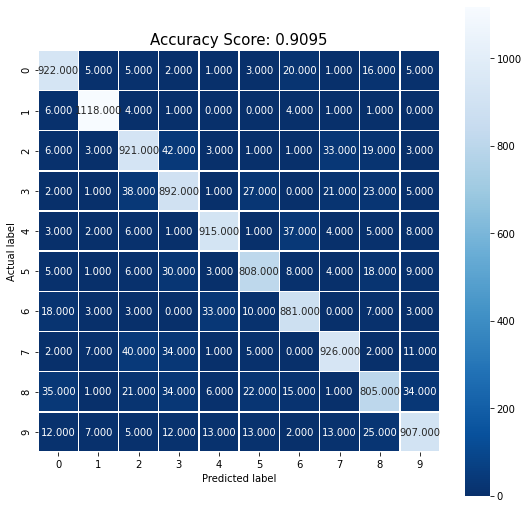

In [ ]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
images = []
orig_labels=[]

for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
 
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H1.reshape(1, -1))[0]

  label = labelNames[pred]
  orig_labels.append(labelNames[y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

In [ ]:
np.shape(images[1])

(96, 96, 3)

4
5
5
1


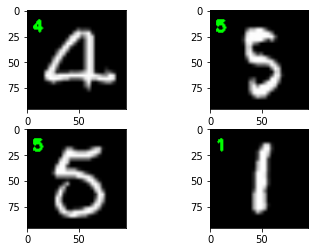

In [ ]:
#Printing some tested samples
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])

#KNN

In [ ]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


In [ ]:
print("Extracting features from training dataset...")
data_train = []
labels_train = []

for img_index in range(len(X_train)):

  image = (X_train[img_index])
 
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 

  data_train.append(H)
  labels_train.append(y_train[img_index])

print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(60000, 36)
(60000,)


In [ ]:
model=KNeighborsClassifier(n_neighbors=15)
model.fit(data_train,labels_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 0.89


In [ ]:
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
for img_ind in range(len(X_test)):
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H.reshape(1, -1))[0]
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(y_test[img_ind])
  
print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000,)
(10000,)


In [ ]:
# Test set Accuracy
accuracy = metrics.accuracy_score(y_test, predict_test)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.8792


[[ 904    5    6    2    1    5   20    2   17   18]
 [   5 1120    2    2    1    0    4    0    1    0]
 [  18    3  879   45    7    3    3   40   16   18]
 [   4    1   55  833    0   31    0   22   50   14]
 [   3    4   13    1  840    1  103    0    6   11]
 [   6    3   16   46    2  754   17    0   33   15]
 [  21    2    5    2   43   17  855    1    5    7]
 [  22    7   47   43    1    8    1  869    8   22]
 [  53    1   25   48    3   32   24    4  729   55]
 [  19    3    4   16    4   12   10    7   41  893]]


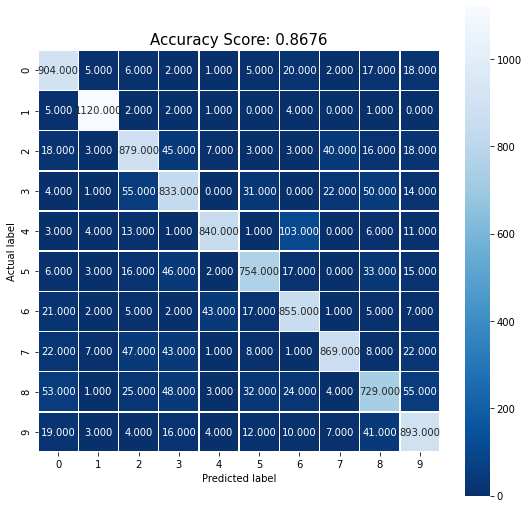

In [ ]:
#confusion matrix
cm  = metrics.confusion_matrix(y_test, predict_test)
print(cm)

#confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
images = []
orig_labels=[]

for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H1.reshape(1, -1))[0]

  label = labelNames[pred]
  orig_labels.append(labelNames[y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

6
3
3
3


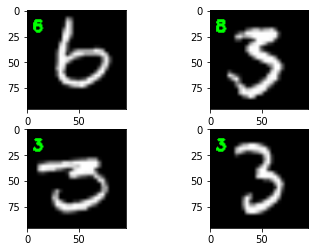

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])

#ANN

In [ ]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
%load_ext tensorboard

Mnist=tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = Mnist.load_data()



2.2.0-rc3
2.3.0-tf
11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Extracting features from training dataset...")
data_train = []
labels_train = []

for img_index in range(len(train_images)):
  image = (train_images[img_index])
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 
  data_train.append(H)
  labels_train.append(train_labels[img_index])

print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(60000, 36)
(60000,)


In [ ]:
data_train = np.float32(data_train)
labels_train = np.float32(labels_train)

valid_images= data_train[:5000]
valid_labels = labels_train[:5000]


train_images  = data_train[5000:]
train_labels=labels_train[5000:]

print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(valid_images))
print(np.shape(valid_labels))
print(np.shape(test_images))


(55000, 36)
(55000,)
(5000, 36)
(5000,)
(10000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[36]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(train_images, train_labels, epochs=50,validation_data=(valid_images, valid_labels))

Epoch 1/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.8159 - accuracy: 0.7744 - val_loss: 0.5213 - val_accuracy: 0.8338
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5115 - accuracy: 0.8374 - val_loss: 0.4665 - val_accuracy: 0.8510
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4648 - accuracy: 0.8512 - val_loss: 0.4251 - val_accuracy: 0.8600
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4273 - accuracy: 0.8635 - val_loss: 0.3907 - val_accuracy: 0.8736
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3990 - accuracy: 0.8717 - val_loss: 0.3646 - val_accuracy: 0.8796
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3771 - accuracy: 0.8790 - val_loss: 0.3528 - val_accuracy: 0.8806
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3611 - accuracy: 0.8833 - val_loss: 0.3384 - val_accuracy:

In [ ]:
##Trying SGD
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[36]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))


Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1481 - accuracy: 0.3786 - val_loss: 1.9673 - val_accuracy: 0.5582
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7586 - accuracy: 0.6344 - val_loss: 1.5625 - val_accuracy: 0.6864
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3804 - accuracy: 0.7084 - val_loss: 1.2329 - val_accuracy: 0.7244
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1070 - accuracy: 0.7423 - val_loss: 1.0191 - val_accuracy: 0.7468
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.9358 - accuracy: 0.7607 - val_loss: 0.8879 - val_accuracy: 0.7618
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.8288 - accuracy: 0.7733 - val_loss: 0.8045 - val_accuracy: 0.7666
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.7595 - accuracy: 0.7815 - val_loss: 0.7479 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 36)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               4736      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1290      
Total params: 6,026
Trainable params: 6,026
Non-trainable params: 0
_________________________________________________________________


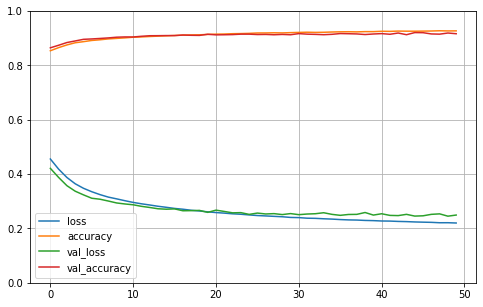

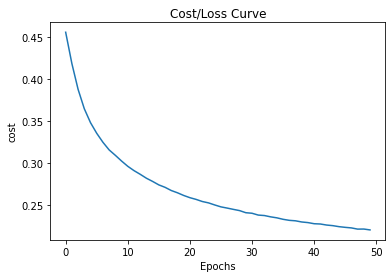

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [ ]:

print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]

for img_ind in range(len(test_images)):
  img=test_images[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H.reshape(1, -1))[0]
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(test_labels[img_ind])

print(np.shape(data_test)) 
print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000, 36)
(10000, 10)
(10000,)


In [ ]:
data_test = np.float32(data_test)
labels_test = np.float32(labels_test)

test_images=data_test
test_labels=labels_test

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.8961


[0.31127429008483887, 0.8960999846458435]